# Netflix Popular Movies and Series

**Analyze popular Netflix movies and series, to get some interesting insights**

## Downloading the Dataset

Download the dataset from kaggle platform using the opendatasets library

In [1]:
!pip install jovian opendatasets --upgrade --quiet
dataset_url = 'https://www.kaggle.com/datasets/narayan63/netflix-popular-movies-dataset'
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rlakshminarayanan
Your Kaggle Key: ········


100%|██████████| 1.17M/1.17M [00:00<00:00, 14.5MB/s]

The dataset has been downloaded and extracted.

In [2]:
import os
os.getcwd()

'/home/jovyan'

In [3]:
data_dir = './netflix-popular-movies-dataset'

In [4]:
import os
os.listdir(data_dir)

['n_movies.csv']

In [5]:
project_name = "Netflix Popular Movies and Series"

In [6]:
!pip install jovian --upgrade -q

In [7]:
import jovian

In [8]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "lakshminarayanan-ravikumar/netflix-popular-movies-and-series" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/lakshminarayanan-ravikumar/netflix-popular-movies-and-series


'https://jovian.ai/lakshminarayanan-ravikumar/netflix-popular-movies-and-series'

## Data Preparation and Cleaning

**TODO** - Load the csv file into a pandas Dataframe. Conduct a basic review of the data using some of the pandas function



In [9]:
import pandas as pd
netflix_df = pd.read_csv('./netflix-popular-movies-dataset/n_movies.csv')

In [10]:
netflix_df.shape

(9957, 9)

In [11]:
netflix_df.head(5)

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


In [12]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   object 
dtypes: float64(1), object(8)
memory usage: 700.2+ KB


It is essential to convert votes into integer data type for analysis

In [13]:
netflix_df['votes'].isna().sum()

1173

There are 1173 NAN values in the votes columns, we can replace it with 0 before converting it to integer

In [14]:
netflix_df['votes'] = netflix_df['votes'].fillna(0)
netflix_df['votes'].isna().sum()

0

In [15]:
netflix_df['votes'] = netflix_df['votes'].str.replace(',','').astype(float)

In [16]:
netflix_df.describe()

,rating,votes
count,8784.000000,8.784000e+03
mean,6.764515,1.952319e+04
std,1.214840,8.757844e+04
min,1.700000,5.000000e+00
25%,6.100000,2.850000e+02
50%,6.900000,1.187000e+03
75%,7.600000,5.421750e+03
max,9.900000,1.844075e+06


In [17]:
netflix_df.columns

Index(['title', 'year', 'certificate', 'duration', 'genre', 'rating',
       'description', 'stars', 'votes'],
      dtype='object')

## Movie or Series - Categorization
The shows have both movies and series. It would be interesting to categorize the shows as series or movies

### Shortest movie on Netflix is World of Tomorrow

The duration of the shortest movie in Netflix is 1h 14 m (74 min), So shows that have a duration below 74 minutes can be categorized into series

In [18]:
netflix_df[['Duration','Units']] = netflix_df['duration'].str.split(expand = True)
netflix_df.head(5)

,title,year,certificate,duration,genre,rating,description,stars,votes,Duration,Units
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031.0,30,min
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199885.0,58,min
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...",501384.0,46,min
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...",9773.0,356,min
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...",15413.0,24,min


Here Devil in Ohio is a web series but as per our condition it is categorized as series, so we have to apply one more condition to fit this criteria. i.e., Finding the longest movie in Netflix

### Longest movie on Netflix is The Irish Man

The duration of the longest movie in Netflix is 3h 29 m (209 min), So shows that have a duration above 209 minutes can be categorized into series

In [19]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   float64
 9   Duration     7921 non-null   object 
 10  Units        7921 non-null   object 
dtypes: float64(2), object(9)
memory usage: 855.8+ KB


In [20]:
netflix_df.describe()

,rating,votes
count,8784.000000,8.784000e+03
mean,6.764515,1.952319e+04
std,1.214840,8.757844e+04
min,1.700000,5.000000e+00
25%,6.100000,2.850000e+02
50%,6.900000,1.187000e+03
75%,7.600000,5.421750e+03
max,9.900000,1.844075e+06


### Converting the Duration column into float to evaluate it for categorization

In [21]:
netflix_df['Duration'].isna().sum()

2036

In [22]:
netflix_df['Duration'] = netflix_df['Duration'].fillna(0)

In [23]:
netflix_df['Duration'] = netflix_df['Duration'].astype(int)
netflix_df['Duration'].dtypes

dtype('int64')

In [24]:
def category(x):
    if x > 74 and x < 209:
        return 'movie'
    else:
        return 'series'
netflix_df['Category'] = netflix_df['Duration'].apply(category)
netflix_df.head(5)

,title,year,certificate,duration,genre,rating,description,stars,votes,Duration,Units,Category
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031.0,30,min,series
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199885.0,58,min,series
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...",501384.0,46,min,series
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...",9773.0,356,min,series
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...",15413.0,24,min,series


In [25]:
netflix_movie_df = netflix_df[netflix_df['Category'] == 'movie']
netflix_movie_df.head()

,title,year,certificate,duration,genre,rating,description,stars,votes,Duration,Units,Category
9,Blonde,(2022),NC-17,166 min,"Biography, Drama, Mystery",6.2,A fictionalized chronicle of the inner life of...,"['Andrew Dominik', '| ', ' Stars:', 'Ana de...",935.0,166,min,movie
11,End of the Road,(II) (2022),R,89 min,"Action, Crime, Drama",4.7,"In this high-octane action thriller, a cross-c...","['Millicent Shelton', '| ', ' Stars:', 'Que...",5122.0,89,min,movie
13,Glass Onion: A Knives Out Mystery,(2022),PG-13,139 min,"Crime, Drama, Mystery",8.1,Famed Southern detective Benoit Blanc travels ...,"['Rian Johnson', '| ', ' Stars:', 'Daniel C...",547.0,139,min,movie
14,Do Revenge,(2022),TV-MA,118 min,Comedy,6.4,Drea and Eleanor agree to go after one another...,"['Jennifer Kaytin Robinson', '| ', ' Stars:...",13457.0,118,min,movie
15,I Came By,(2022),TV-MA,110 min,Thriller,6.1,Follows a young graffiti artist who discovers ...,"['Babak Anvari', '| ', ' Stars:', 'Antonio ...",16230.0,110,min,movie


In [26]:
netflix_series_df = netflix_df[netflix_df['Category'] == 'series']
netflix_series_df.head()

,title,year,certificate,duration,genre,rating,description,stars,votes,Duration,Units,Category
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031.0,30,min,series
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199885.0,58,min,series
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...",501384.0,46,min,series
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...",9773.0,356,min,series
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...",15413.0,24,min,series


In [27]:
import jovian

In [28]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "lakshminarayanan-ravikumar/netflix-popular-movies-and-series" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/lakshminarayanan-ravikumar/netflix-popular-movies-and-series


'https://jovian.ai/lakshminarayanan-ravikumar/netflix-popular-movies-and-series'

## Exploratory Analysis and Visualization

**Analyze the influence of various factors like duration, rating in the customer votes**



Importing`matplotlib.pyplot` and `seaborn`.

In [29]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Analysis 1 - Distribution of duration of the movie**

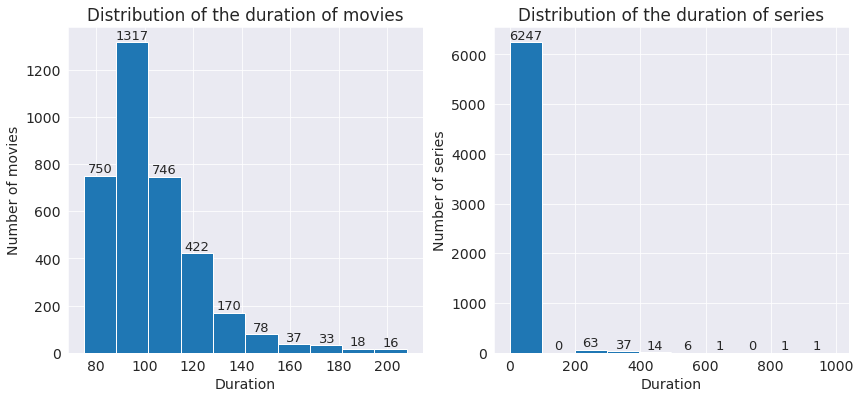

In [30]:
fig, ax = plt.subplots(1,2,figsize = (14,6))
values,bins,bars = ax[0].hist(netflix_movie_df['Duration'],bins = 10)
ax[0].set(xlabel = "Duration", ylabel = "Number of movies", title = "Distribution of the duration of movies")
ax[0].bar_label(bars, fontsize=13)
values,bins,bars = ax[1].hist(netflix_series_df['Duration'],bins = 10)
ax[1].set(xlabel = "Duration", ylabel = "Number of series", title = "Distribution of the duration of series")
ax[1].bar_label(bars, fontsize=13)
plt.show()

**Insight** - Here we can see, more than 80% of the movies have a duration below 140 minutes and more than 95% of the series are in the 0 - 100 duration. The series above 100 minutes can be ignored, since it can be the sum of all the episodes in the series.

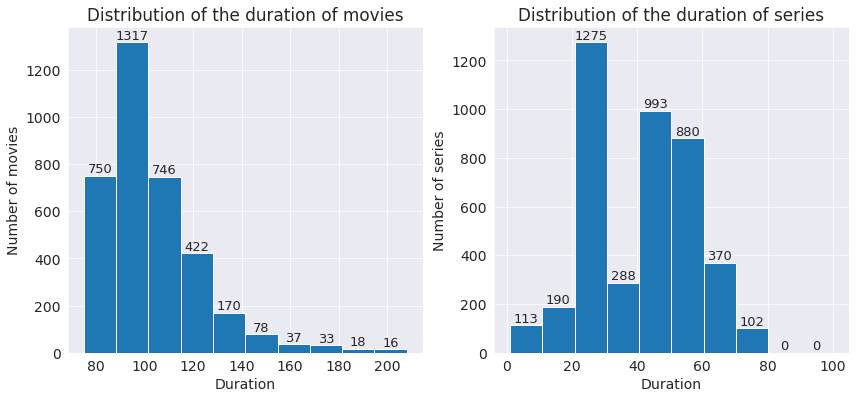

In [31]:
fig, ax = plt.subplots(1,2,figsize = (14,6))
values,bins,bars = ax[0].hist(netflix_movie_df['Duration'],bins = 10)
ax[0].set(xlabel = "Duration", ylabel = "Number of movies", title = "Distribution of the duration of movies")
ax[0].bar_label(bars, fontsize=13)
values,bins,bars = ax[1].hist(netflix_series_df['Duration'],bins = 10,range = [1,100])
ax[1].set(xlabel = "Duration", ylabel = "Number of series", title = "Distribution of the duration of series")
ax[1].bar_label(bars, fontsize=13)
plt.show()

**Analysis 2 - Distribution of ratings of the movie**

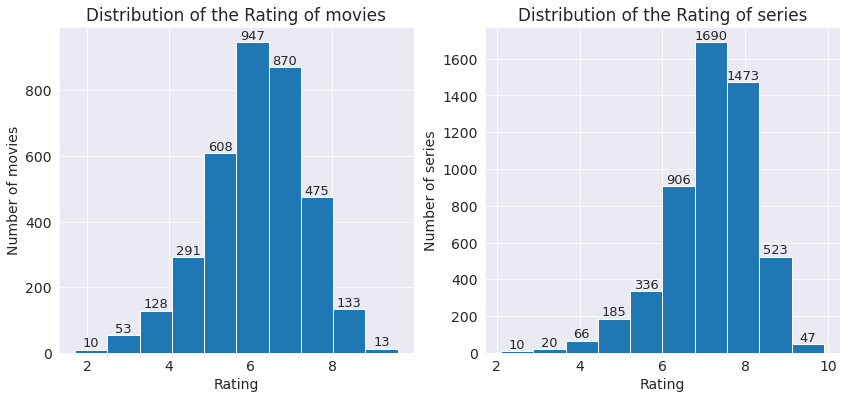

In [32]:
fig, ax = plt.subplots(1,2,figsize = (14,6))
values,bins,bars = ax[0].hist(netflix_movie_df['rating'],bins = 10)
ax[0].set(xlabel = "Rating", ylabel = "Number of movies", title = "Distribution of the Rating of movies")
ax[0].bar_label(bars, fontsize=13)
values,bins,bars = ax[1].hist(netflix_series_df['rating'],bins = 10)
ax[1].set(xlabel = "Rating", ylabel = "Number of series", title = "Distribution of the Rating of series")
ax[1].bar_label(bars, fontsize=13)
plt.show()

**Analysis 3 - Top 10 movies based on the Votes**

In [33]:
netflix_movie_df.sort_values('votes',ascending = False).head(10)

,title,year,certificate,duration,genre,rating,description,stars,votes,Duration,Units,Category
9921,The Lord of the Rings: The Fellowship of the Ring,(2001),PG-13,178 min,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1844075.0,178,min,movie
20,The Lord of the Rings: The Fellowship of the Ring,(2001),PG-13,178 min,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1844055.0,178,min,movie
57,The Lord of the Rings: The Return of the King,(2003),PG-13,201 min,"Action, Adventure, Drama",9.0,Gandalf and Aragorn lead the World of Men agai...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1819157.0,201,min,movie
78,The Lord of the Rings: The Two Towers,(2002),PG-13,179 min,"Action, Adventure, Drama",8.8,While Frodo and Sam edge closer to Mordor with...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1642708.0,179,min,movie
153,Gladiator,(2000),R,155 min,"Action, Adventure, Drama",8.5,A former Roman General sets out to exact venge...,"['Ridley Scott', '| ', ' Stars:', 'Russell ...",1481531.0,155,min,movie
173,The Departed,(2006),R,151 min,"Crime, Drama, Thriller",8.5,An undercover cop and a mole in the police att...,"['Martin Scorsese', '| ', ' Stars:', 'Leona...",1310171.0,151,min,movie
96,Titanic,(1997),PG-13,194 min,"Drama, Romance",7.9,A seventeen-year-old aristocrat falls in love ...,"['James Cameron', '| ', ' Stars:', 'Leonard...",1158746.0,194,min,movie
161,Léon: The Professional,(1994),R,110 min,"Action, Crime, Drama",8.5,12-year-old Mathilda is reluctantly taken in b...,"['Luc Besson', '| ', ' Stars:', 'Jean Reno,...",1147345.0,110,min,movie
271,Kill Bill: Vol. 1,(2003),R,111 min,"Action, Crime, Drama",8.2,"After awakening from a four-year coma, a forme...","['Quentin Tarantino', '| ', ' Stars:', 'Uma...",1103348.0,111,min,movie
113,Jurassic Park,(1993),PG-13,127 min,"Action, Adventure, Sci-Fi",8.2,A pragmatic paleontologist touring an almost c...,"['Steven Spielberg', '| ', ' Stars:', 'Sam ...",978402.0,127,min,movie


**Analysis 3 - Top 10 series based on the Votes**

In [34]:
netflix_series_df.sort_values('votes',ascending = False).head(10)

,title,year,certificate,duration,genre,rating,description,stars,votes,Duration,Units,Category
9951,Breaking Bad,(2008–2013),TV-MA,49 min,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,"['Bryan Cranston, ', 'Aaron Paul, ', 'Anna Gun...",1831359.0,49,min,series
7,Breaking Bad,(2008–2013),TV-MA,49 min,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,"['Bryan Cranston, ', 'Aaron Paul, ', 'Anna Gun...",1831340.0,49,min,series
9948,Stranger Things,(2016– ),TV-14,51 min,"Drama, Fantasy, Horror",8.7,"When a young boy disappears, his mother, a pol...","['Millie Bobby Brown, ', 'Finn Wolfhard, ', 'W...",1149902.0,51,min,series
10,Stranger Things,(2016– ),TV-14,51 min,"Drama, Fantasy, Horror",8.7,"When a young boy disappears, his mother, a pol...","['Millie Bobby Brown, ', 'Finn Wolfhard, ', 'W...",1149889.0,51,min,series
9932,Friends,(1994–2004),TV-14,22 min,"Comedy, Romance",8.9,Follows the personal and professional lives of...,"['Jennifer Aniston, ', 'Courteney Cox, ', 'Lis...",979428.0,22,min,series
26,Friends,(1994–2004),TV-14,22 min,"Comedy, Romance",8.9,Follows the personal and professional lives of...,"['Jennifer Aniston, ', 'Courteney Cox, ', 'Lis...",979424.0,22,min,series
9953,The Walking Dead,(2010–2022),TV-MA,44 min,"Drama, Horror, Thriller",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...",970067.0,44,min,series
12,The Walking Dead,(2010–2022),TV-MA,44 min,"Drama, Horror, Thriller",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...",970060.0,44,min,series
99,Dexter,(2006–2013),TV-MA,53 min,"Crime, Drama, Mystery",8.7,"He's smart. He's lovable. He's Dexter Morgan, ...","['Michael C. Hall, ', 'Jennifer Carpenter, ', ...",720792.0,53,min,series
64,How I Met Your Mother,(2005–2014),TV-14,22 min,"Comedy, Romance",8.3,A father recounts to his children - through a ...,"['Josh Radnor, ', 'Jason Segel, ', 'Cobie Smul...",676121.0,22,min,series


**Insight** - Here 9 out of 10 movies in the top 10 voted movie list and 10 out of 10 series in the top 10 voted series list has a rating greater than 8.0, it would be interesting to find the correlation between rating and votes.

**Analysis 4 - Rating vs Votes - Correlation**

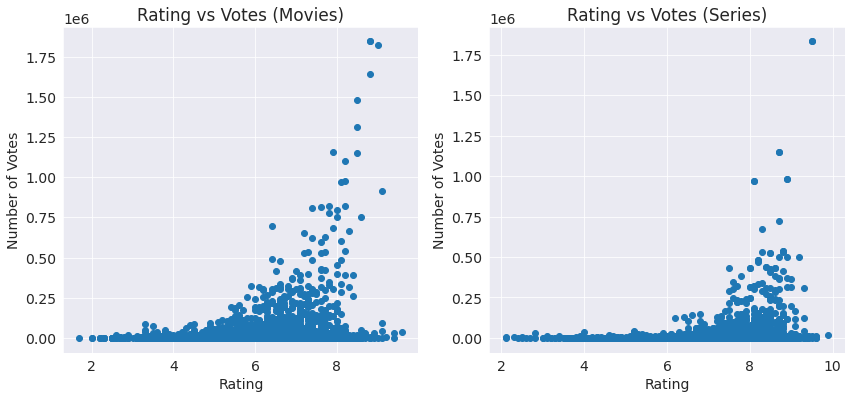

In [35]:
fig, ax = plt.subplots(1,2,figsize = (14,6))
ax[0].scatter(netflix_movie_df['rating'],netflix_movie_df['votes'])
ax[0].set(xlabel = "Rating", ylabel = "Number of Votes", title = "Rating vs Votes (Movies)")
ax[1].scatter(netflix_series_df['rating'],netflix_series_df['votes'])
ax[1].set(xlabel = "Rating", ylabel = "Number of Votes", title = "Rating vs Votes (Series)")
plt.show()

**Insight** - The trend between rating and votes is a positive correlation for both movies and series. Let us try a scatter plot for checking the correlation between duration and votes

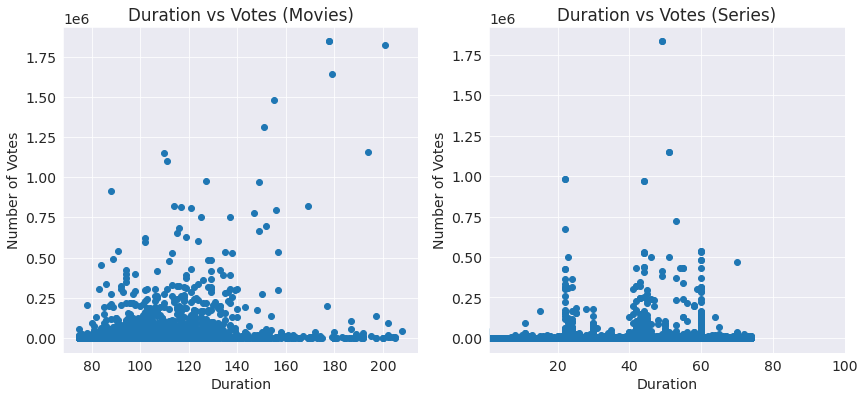

In [36]:
fig, ax = plt.subplots(1,2,figsize = (14,6))
ax[0].scatter(netflix_movie_df['Duration'],netflix_movie_df['votes'])
ax[0].set(xlabel = "Duration", ylabel = "Number of Votes", title = "Duration vs Votes (Movies)")
ax[1].scatter(netflix_series_df['Duration'],netflix_series_df['votes'])
ax[1].set(xlabel = "Duration", ylabel = "Number of Votes", title = "Duration vs Votes (Series)",xlim = (1,100))
plt.show()

**Insight** - The duration of the series seems to be independent of the votes, but in case of movies, people prefer to watch movies in the duration of 80 mins to 150 mins (A mild relation!)

**Analysis 5 - Top Movie genre based on the number of votes**

In [37]:
movie_genre_df = netflix_movie_df[['title','genre','votes']]
movie_genre_df.head()

,title,genre,votes
9,Blonde,"Biography, Drama, Mystery",935.0
11,End of the Road,"Action, Crime, Drama",5122.0
13,Glass Onion: A Knives Out Mystery,"Crime, Drama, Mystery",547.0
14,Do Revenge,Comedy,13457.0
15,I Came By,Thriller,16230.0


In [38]:
movie_genre_df.genre.isna().sum()

3

In [39]:
movie_genre_df['genre'] = movie_genre_df['genre'].fillna('unknown')

/tmp/ipykernel_82/2550222073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_genre_df['genre'] = movie_genre_df['genre'].fillna('unknown')


In [40]:
split_mgenre_df = movie_genre_df.set_index(['title','votes']).genre.str.split(',', expand=True)
split_mgenre_df.columns.name = 'value'
stack_mgenre_df = split_mgenre_df.stack()
stack_mgenre_df.name = 'genre'
genre_movie_df = stack_mgenre_df.reset_index()
genre_movie_df['genre'] = genre_movie_df.genre.str.strip()
genre_movie_df

,title,votes,value,genre
0,Blonde,935.0,0,Biography
1,Blonde,935.0,1,Drama
2,Blonde,935.0,2,Mystery
3,End of the Road,5122.0,0,Action
4,End of the Road,5122.0,1,Crime
...,...,...,...,...
7981,Glass Onion: A Knives Out Mystery,548.0,0,Crime
7982,Glass Onion: A Knives Out Mystery,548.0,1,Drama
7983,Glass Onion: A Knives Out Mystery,548.0,2,Mystery
7984,The Gray Man,172166.0,0,Action


In [41]:
len(genre_movie_df.genre.unique())

28

There are totally 28 genres. Let us see which genre people has highest number of movies

In [42]:
genre_movie_df.genre.value_counts().head(10)

Drama          1682
Comedy         1122
Action          698
Crime           604
Documentary     543
Thriller        518
Romance         459
Adventure       390
Horror          325
Mystery         255
Name: genre, dtype: int64

In [43]:
popular_genre = genre_movie_df.groupby(['genre'])['votes'].sum().rename('votes').reset_index()
popular_genre.head()

,genre,votes
0,Action,45508802.0
1,Adventure,36123274.0
2,Animation,8624049.0
3,Biography,5578575.0
4,Comedy,26110433.0


In [44]:
popular_genre.sort_values('votes',ascending = False).head(5)

,genre,votes
7,Drama,54059266.0
0,Action,45508802.0
1,Adventure,36123274.0
4,Comedy,26110433.0
5,Crime,24481272.0


**Insight** - The above mentioned genre are the top 5 voted movie genre's

In [45]:
import jovian

In [46]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "lakshminarayanan-ravikumar/netflix-popular-movies-and-series" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/lakshminarayanan-ravikumar/netflix-popular-movies-and-series


'https://jovian.ai/lakshminarayanan-ravikumar/netflix-popular-movies-and-series'

## Top 5 Interesting Questions

The following are some of the interesting question of the netflix data



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1: What is the average runtime of a movie and a series?

In [47]:
avg_movie_runtime = netflix_movie_df['Duration'].sum()/netflix_movie_df.shape[0]
print("Average Runtime of a movie is {} minutes".format(avg_movie_runtime))

Average Runtime of a movie is 103.27237245609145 minutes


In [48]:
avg_series_runtime = netflix_series_df['Duration'].sum()/netflix_series_df.shape[0]
print("Average Runtime of a series is {} minutes".format(avg_series_runtime))

Average Runtime of a series is 33.58037676609105 minutes


#### Q2: What is the ratio of votes of top 10 movies or series to the total number of votes?

In [49]:
ratio_votes_movie = netflix_movie_df.sort_values('votes',ascending = False).votes.head(10).sum()/netflix_movie_df['votes'].sum()
print("The ratio of votes of top 10 movies to the total number of votes is {} ".format(ratio_votes_movie))

The ratio of votes of top 10 movies to the total number of votes is 0.13698175135850033 


In [50]:
ratio_votes_series = netflix_series_df.sort_values('votes',ascending = False).votes.head(10).sum()/netflix_series_df['votes'].sum()
print("The ratio of votes of top 10 movies to the total number of votes is {} ".format(ratio_votes_series))

The ratio of votes of top 10 movies to the total number of votes is 0.1683305150366694 


13.7% of total votes are for top 10 movies by votes and 16.8% of total votes are for top 10 series by votes

#### Q3: Which is the highest rated series?

In [51]:
highest_rated_series = netflix_series_df.sort_values('rating',ascending = False).head(1)
highest_rated_series = highest_rated_series.set_index('title')
print('The highest rated series is {}'.format(highest_rated_series.index[0]))

The highest rated series is BoJack Horseman


#### Q4: What are the top 5 genre of the series by votes?

In [52]:
series_genre_df = netflix_series_df[['title','genre','votes']]
series_genre_df.head()

,title,genre,votes
0,Cobra Kai,"Action, Comedy, Drama",177031.0
1,The Crown,"Biography, Drama, History",199885.0
2,Better Call Saul,"Crime, Drama",501384.0
3,Devil in Ohio,"Drama, Horror, Mystery",9773.0
4,Cyberpunk: Edgerunners,"Animation, Action, Adventure",15413.0


In [53]:
split_genre_series = series_genre_df.set_index(['title','votes']).genre.str.split(',',expand = True)
split_genre_series.columns.name = 'values'
stack_genre_series = split_genre_series.stack()
stack_genre_series.name = 'genre'
top_series = stack_genre_series.reset_index()
top_series.head()

,title,votes,values,genre
0,Cobra Kai,177031.0,0,Action
1,Cobra Kai,177031.0,1,Comedy
2,Cobra Kai,177031.0,2,Drama
3,The Crown,199885.0,0,Biography
4,The Crown,199885.0,1,Drama


In [54]:
top_series['genre'] = top_series.genre.str.strip()
len(top_series.genre.unique())

27

There are 27 different genre series in the Netflix platform

In [55]:
top_series.groupby('genre')['votes'].sum().rename('votes').reset_index().sort_values('votes',ascending = False).head(5)

,genre,votes
7,Drama,49030103.0
5,Crime,21330838.0
4,Comedy,16842211.0
0,Action,16348371.0
1,Adventure,11666664.0


#### Q5: Does rating above 7.0 really influence the votes?

In [56]:
ratio_movie_rating = netflix_movie_df.loc[netflix_movie_df['rating'] > 7.0, 'votes'].sum() / netflix_movie_df.votes.sum()
print('The ratio of votes of the movies above 7.0 rating to the total number of votes is {}'.format(ratio_movie_rating))

The ratio of votes of the movies above 7.0 rating to the total number of votes is 0.5536155161718146


In [57]:
ratio_series_rating = netflix_series_df.loc[netflix_series_df['rating'] > 7.0, 'votes'].sum() / netflix_series_df.votes.sum()
print('The ratio of votes of the series above 7.0 rating to the total number of votes is {}'.format(ratio_series_rating))

The ratio of votes of the series above 7.0 rating to the total number of votes is 0.918759225213698


55% of votes were given to movies having a rating above 7.0 and interestingly 92% of votes were given to series having a rating above 7.0. This shows that rating highly influence the likeability.

In [58]:
import jovian

In [59]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "lakshminarayanan-ravikumar/netflix-popular-movies-and-series" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/lakshminarayanan-ravikumar/netflix-popular-movies-and-series


'https://jovian.ai/lakshminarayanan-ravikumar/netflix-popular-movies-and-series'

## Inferences and Conclusion

**Now that was a great Exploratory Data Analysis done on the Netflix Dataset from kaggle. The following are some of the interesting inferences and conclusions that can be taken away from this analysis**

**Assumption and generalization** 
- The shows that have duration between 74 minutes and 209 minutes is categorized as movies (Data Source - Google), remaining shows are categorized as series
- The shows that have duration and votes as a NAN float values are replaced by 0 in their corresponding columns
- The shows that have a NAN value as genre is replaced by unknown

**Inferences**
- There are totally 28 movie genres and 27 series genres
- From the histogram plot, more than 80% of the movies have a duration below 140 minutes and more than 95% of the series are in the 0 - 100 duration. The series above 100 minutes can be ignored, since it can be the sum of all the episodes in the series.
- 9 out of 10 movies in the top 10 voted movie list and 10 out of 10 series in the top 10 voted series list has a rating greater than 8.0, it would be interesting to find the correlation between rating and votes.
- Looking at the scatter plot between ratings and votes it is evident that the trend between rating and votes is a positive correlation for both movies and series. 
- The duration of the series seems to be independent of the votes, but in case of movies, people prefer to watch movies in the duration of 80 mins to 150 mins.
- The top 5 voted movie genres are Drama, Action, Adventure, Comedy, Crime
- Average Runtime of a movie is 103.27237245609145 minutes and Average Runtime of a series is 33.58037676609105 minutes.
- 13.7% of total votes are for top 10 movies by votes and 16.8% of total votes are for top 10 series by votes.
- 55% of votes were given to movies having a rating above 7.0 and interestingly 92% of votes were given to series having a rating above 7.0. This shows that rating highly influence the likeability.

**Conclusion** - Starting with the positive correlation between ratings and votes and to the ratio of votes for shows having rating more 7.0 being more than 55% and 92% for movies and series correspondingly, it is evident that ratings are the major contributing factor for the number of votes.

In [60]:
import jovian

In [61]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "lakshminarayanan-ravikumar/netflix-popular-movies-and-series" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/lakshminarayanan-ravikumar/netflix-popular-movies-and-series


'https://jovian.ai/lakshminarayanan-ravikumar/netflix-popular-movies-and-series'